## Project goal

For one reason or another, the matplotlib syntax constantly escapes me. So, I have created this notebook to slowly work through the ins and outs of matplotlib and seaborn in hope to 1) cement the knowledge in my head and/or 2) create a personal cheat sheet which I can refer to when I undoubtably forget the syntax again.

Whilst there are a range of matplotlib and seaborn resources and cheat sheets already available, the best way for me to learn is to write, explain and teach. Thus, my recreation of the matplotlib basics wheel here.

## Resources

The following is a list of useful matplotlib and seaborn resources:
- <a href="https://realpython.com/python-matplotlib-guide/">Real Python: Python Plotting with Matplotlib Guide</a>
- <a href="https://seaborn.pydata.org/tutorial.html">Seaborn Tutorial</a>
- <a href="https://github.com/jakevdp/PythonDataScienceHandbook">Python Data Science Handbook</a>




## Import dependencies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

## Load dummy dataset
The seaborn package comes with some pre-defined datasets to make our life easy, so we will load the titanic dataset

In [2]:
# Display the available seaborn datasets (requires an internet connection)
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [3]:
# Load tips dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Basic plots

### Setting a plot style

In [4]:
plt.style.use('seaborn-white')

### Creating a single plot

There are two basic methods to plotting with matplotlib:
1. Using the matlab style syntax
2. Using object-oriented style syntax

#### matlab style

In [5]:
# Group the number of tips received by day and split out into an x and y varible
grouped_by_day = df.groupby('day').sum()
days = grouped_by_day.index
tip_amt = grouped_by_day['tip']
bill_amt = grouped_by_day['total_bill'] # Will be used later

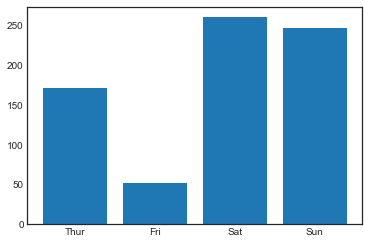

In [6]:
# Create a figure
plt.figure()

# Plot the data
plt.bar(days, tip_amt);

#### object-oriented style
NB: Could plot directly from DF - this is covered later

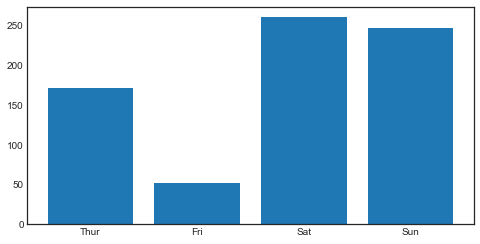

In [7]:
# Create a stateless (OO) graph using the plt.subplots() method
fig, ax = plt.subplots(figsize=(8,4))

# Use ax.type_of_plot and pass in x and y
ax.bar(days, tip_amt);

For simplicity, the rest of this notebook uses the object-orientated style of plotting, as this is generally more useful as plotting needs get more complicated.

#### Titles

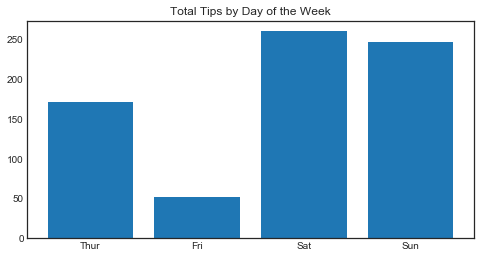

In [8]:
# Add a title 
ax.set_title("Total Tips by Day of the Week")

# Display the plot
fig

#### Axis Labels

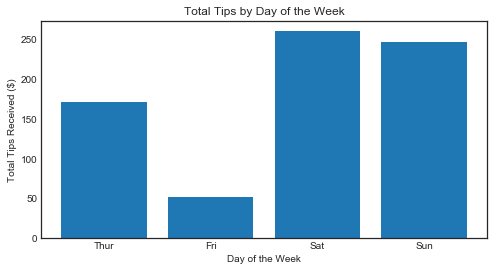

In [9]:
# Add axis labels
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Tips Received ($)')

# Display the plot
fig

#### Legends

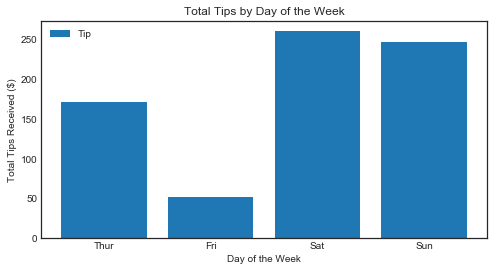

In [10]:
#Create a legend
ax.legend(['Tip'])

# Display plot
fig

### Annotating plots with text
Use ax.text(x_pos, y_pos, 'text') on object-oriented plots

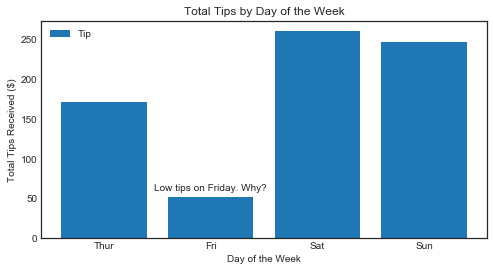

In [11]:
# Annotate Friday as low
ax.text(1, 60, "Low tips on Friday. Why?", ha='center')
fig

### Annotating plots with arrows and text
Use ax.annotate('text', xy=(coord_of_arrow), xytext=(coord_of_text)) on object-oriented plots

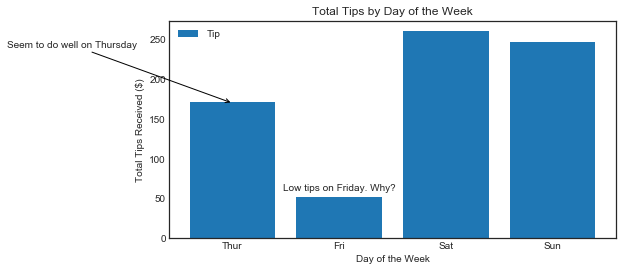

In [12]:
# Annotate Thursday with an arrow
ax.annotate('Seem to do well on Thursday', 
            xy=(0, 170), 
            xytext=(-1.5, 240), 
            arrowprops=dict(arrowstyle='->'), 
            ha='center')
fig

#### Plotting multiple elements

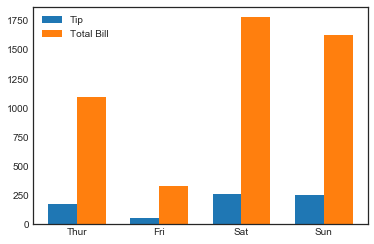

In [13]:
# Create length of the plot and set the width of the bars
ind = np.arange(len(days))
width = 0.35

# Create a figure
fig2, ax2 = plt.subplots()

# Use ax.type_of_plot and pass in x and y
ax2.bar(ind, tip_amt, width=width);
ax2.bar(ind + width ,bill_amt, width=width);

# Set the xticks width and set xtickslabels to days
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(days)

#Create a legend
ax2.legend(['Tip', 'Total Bill']);

## Multiple plots

### Subplots

<BarContainer object of 4 artists>

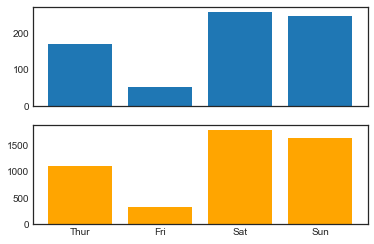

In [14]:
# Create 2 subplots, which share the same x axis labels
fig, ax = plt.subplots(2, sharex=True)

# Plot axis 0 and 1 as tip_amt and bill_amt
ax[0].bar(days, tip_amt)
ax[1].bar(days, bill_amt, color='orange')

### Creating a grid

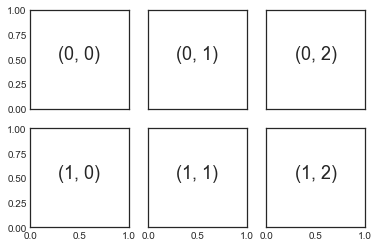

In [15]:
# Create a grid of 2 rows x 3 cols
# sharex and sharey removes inner x and y labelling of each plot
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# plot to each of the subplots (could have done with a for loop, but wanted to be explicit)
ax[0,0].text(0.5, 0.5, str((0, 0)), fontsize=18, ha='center')
ax[0,1].text(0.5, 0.5, str((0, 1)), fontsize=18, ha='center')
ax[0,2].text(0.5, 0.5, str((0, 2)), fontsize=18, ha='center')
ax[1,0].text(0.5, 0.5, str((1, 0)), fontsize=18, ha='center')
ax[1,1].text(0.5, 0.5, str((1, 1)), fontsize=18, ha='center')
ax[1,2].text(0.5, 0.5, str((1, 2)), fontsize=18, ha='center');

###  GridSpec for custom layouts
Below example adapted from the <a href="https://github.com/jakevdp/PythonDataScienceHandbook"> Data Science Handbook</a>.

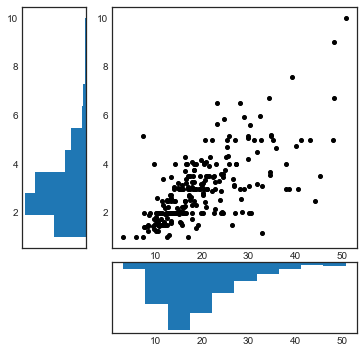

In [16]:
# Create x and y variables
x = df['total_bill']
y = df['tip']

# Create a figure which is 6x6 in size 
fig = plt.figure(figsize=(6, 6))

# Create a GridSpec 
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.4)

# Create multiple plots add arrange on the 6x6 grid
main_scat = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels = [], sharey=main_scat)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels = [], sharex=main_scat)


main_scat.plot(x, y, 'ok', markersize=4)

x_hist.hist(x, orientation='vertical')
x_hist.invert_yaxis()

y_hist.hist(y, orientation='horizontal')
y_hist.invert_xaxis()

## Plotting with pandas
Rather than splitting out variables from a pandas dataframe into separate variables for plotting, we can directly plot from the dataframe using the pd.plot() method. 

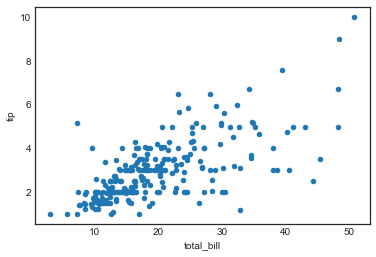

In [17]:
# Plotting a scatter plot directly from a pandas DF
df.plot.scatter('total_bill', 'tip');

#### Combing with pandas groupby

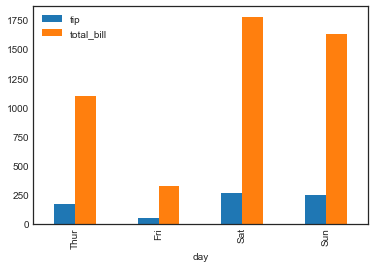

In [18]:
# Plot a Combine with pd.groupby to display the sum of tips and bill per day
df.groupby('day')[['tip', 'total_bill']].sum().plot(kind='bar');

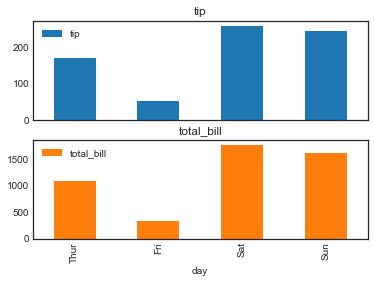

In [19]:
# Plot separate subplots - pass subplots=True arg
df.groupby('day')[['tip', 'total_bill']].sum().plot(kind='bar', subplots=True);

## Seaborn
Seaborn is a package built on top of matplotlib which extends its functionality (e.g. adds violin plots) and provides some aesthetic improvements to the base matplotlib style of plotting.

Many of the below examples are adapted from the <a href"https://seaborn.pydata.org/tutorial.html">seaborn docs</a>

### Categorical plots
Can either use the sns.catplot() method and pass in the kind arg, or directly create the required plot by calling the appropriate sns plot (e.g. sns.swarmplot() )

#### Basic plot

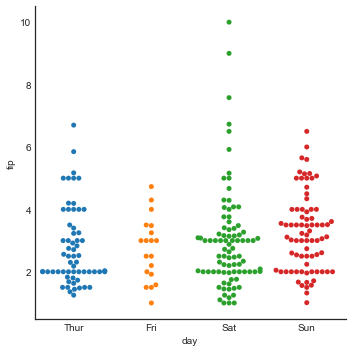

In [20]:
# Create a swarmplot
sns.catplot(x = 'day', y = 'tip', kind='swarm', data = df);

#### Adding hue

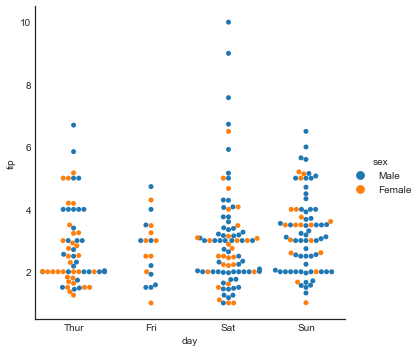

In [21]:
# Display points split by sex 
sns.catplot(x = 'day', y = 'tip', kind='swarm', hue='sex', data = df);

#### Conditional display with queries

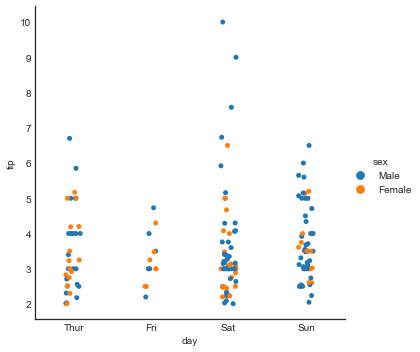

In [22]:
# Only display tips greater than $2
sns.catplot(x = 'day', y = 'tip', hue = 'sex', data = df.query('tip > 2'));

#### Ordering

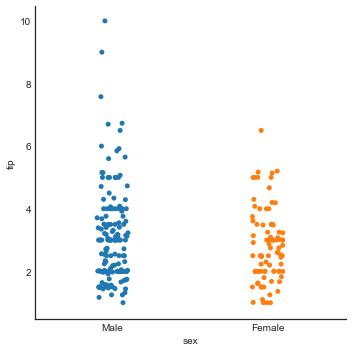

In [23]:
# Show tips by male or female
sns.catplot(x = 'sex', y = 'tip', order=['Male', 'Female'], data = df);

#### Displaying multiple plots

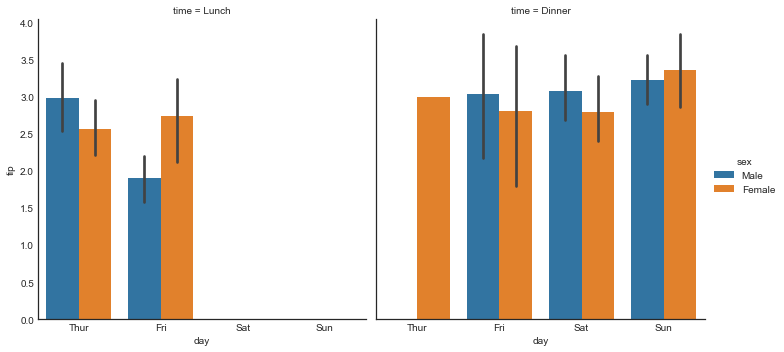

In [24]:
sns.catplot(x='day', y='tip', hue='sex', col='time', kind='bar', data=df);

### Continious plots
Similar to categorical plots, we can either use the relplot() "parent" method and pass in the kind arg, or directly choose the type of plot by calling it (e.g. sns.scatterplot() ).

#### Basic plot

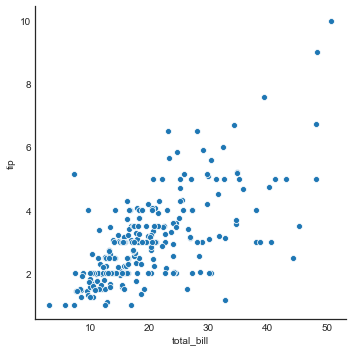

In [25]:
# Scatter plot of total_bill vs tips
sns.relplot(x='total_bill', y='tip', data=df);

#### Adding hue and styles

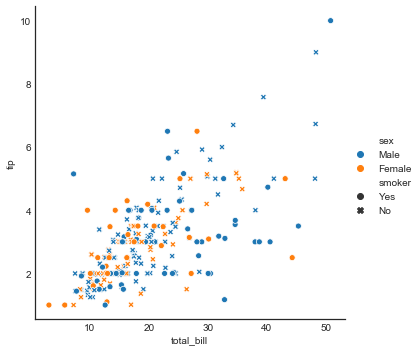

In [26]:
# Add hue of sex and style of whether they are a smoker or not
sns.relplot(x='total_bill', y='tip', hue='sex', style='smoker', data=df);

#### Multiple plots
Similar to catplot(), we can display multiple plots for continious variables.

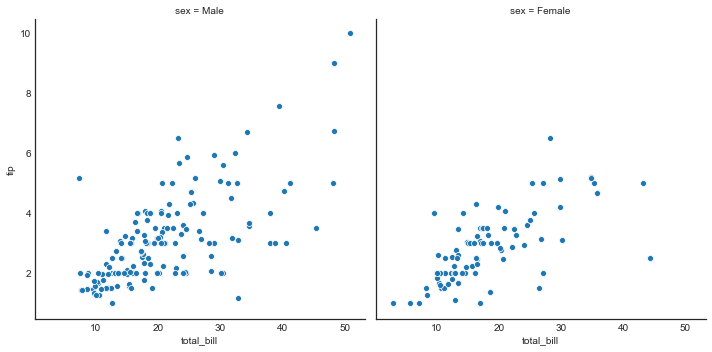

In [27]:
# Display total_bill vs tip, split by sex
sns.relplot(x='total_bill', y='tip', col='sex', data=df);

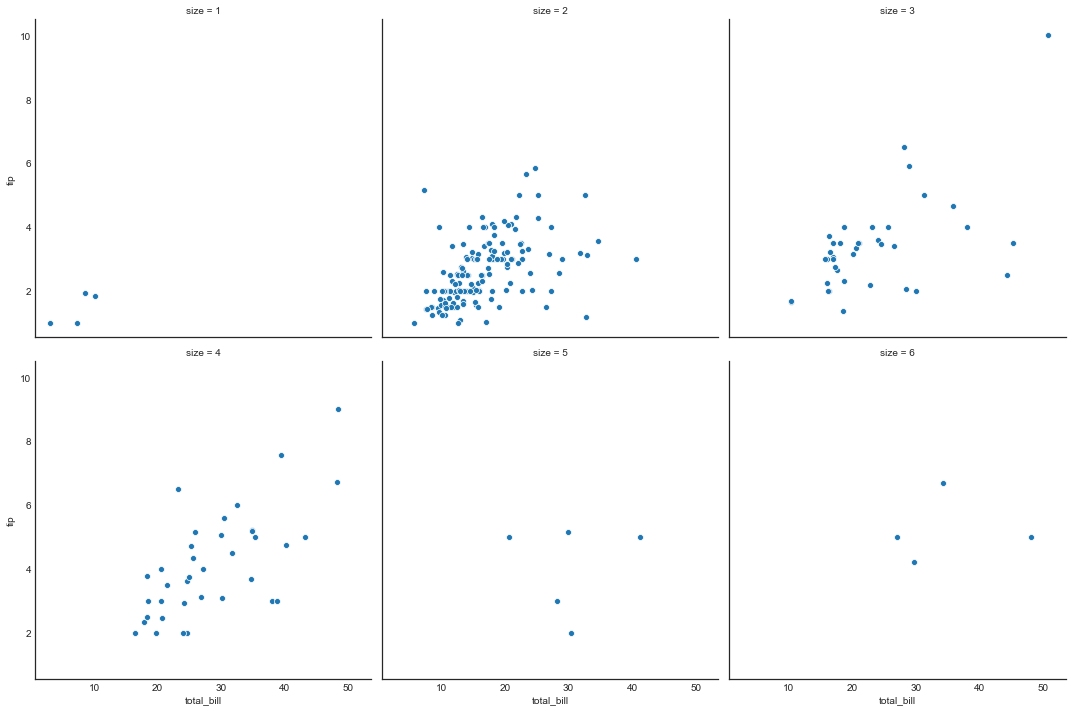

In [28]:
# Plot mutliple plots by the size of the group
sns.relplot(x='total_bill', y='tip', col='size', col_wrap=3, data=df);

## Types of plots

### Matplotlib plots

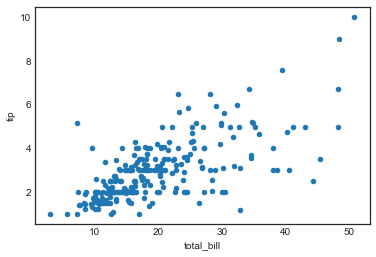

In [29]:
# Scatter
df.plot.scatter('total_bill', 'tip');

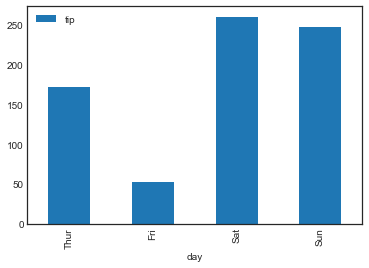

In [30]:
# Bar
df.groupby('day')[['tip']].sum().plot.bar();

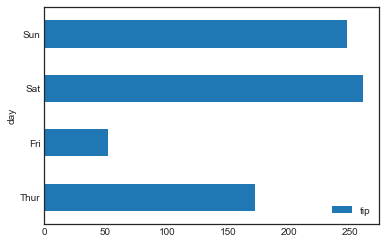

In [31]:
# Horizontal Bar
df.groupby('day')[['tip']].sum().plot.barh();

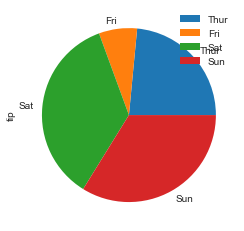

In [32]:
# Pie
df.groupby('day')[['tip']].sum().plot.pie(subplots=True);

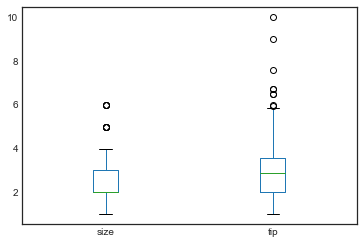

In [33]:
# Box plot
df[['size', 'tip']].plot.box();

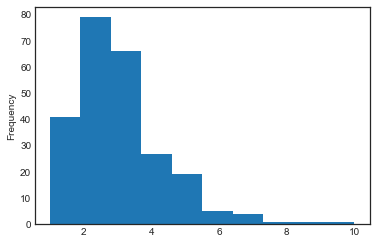

In [34]:
# Histogram
df['tip'].plot.hist();

Other matplotlib plots which aren't shown above include:
- area
- density
- hexbin
- kernal density estimation
- line

### Seaborn plots
Seaborn includes all of the same plots as matplotlib, with some additional plots.

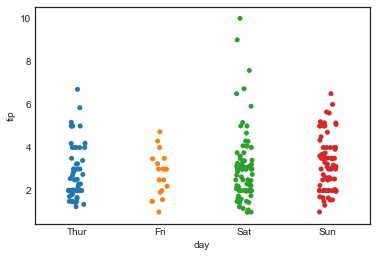

In [35]:
# Strip plot
sns.stripplot(x = 'day', y = 'tip', data = df, jitter=True);

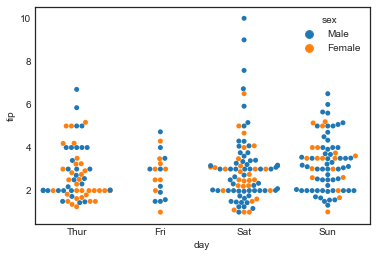

In [36]:
# Swarm plot
sns.swarmplot(x = 'day', y = 'tip', data = df, hue='sex');

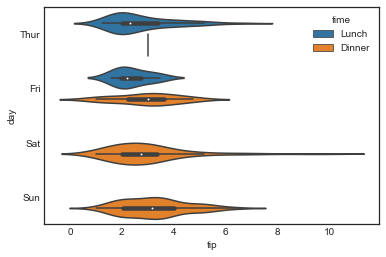

In [37]:
# Violin plots
sns.violinplot(x = 'tip', y = 'day', hue='time', data = df);

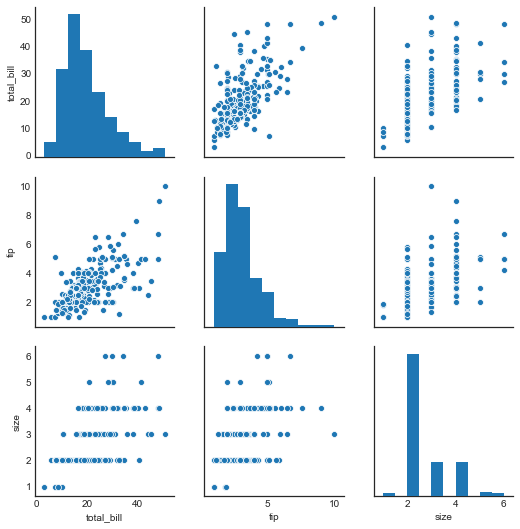

In [38]:
# Pairplot
sns.pairplot(df);

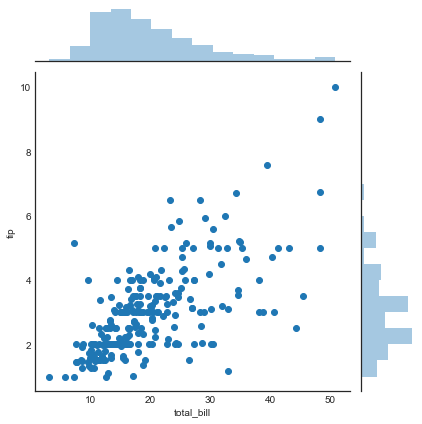

In [39]:
# Jointplot
sns.jointplot(x = 'total_bill', y = 'tip', data = df);